# Worksheet 07

Name: Dima Kazlouski
UID: U49144585

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

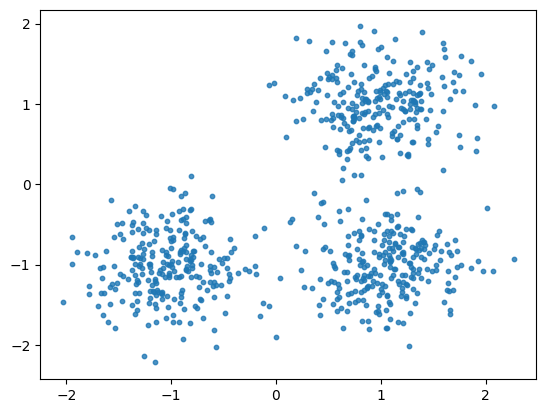

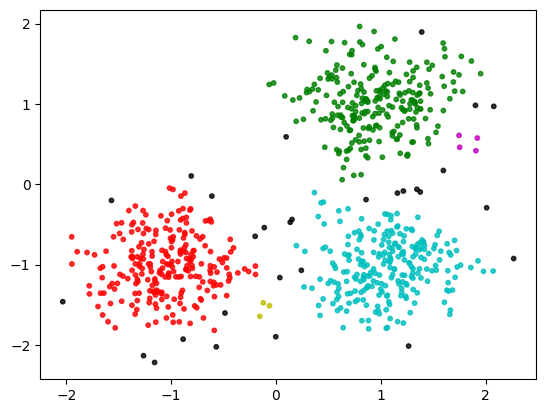

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
from scipy.spatial import distance


centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        assignments = [-1] * len(self.dataset)
        C = 0
        
        for P in range(len(self.dataset)):
            if assignments[P] != -1:
                continue
            neighbors = [i for i in range(len(self.dataset)) if distance.euclidean(self.dataset[P], self.dataset[i]) < self.epsilon]
            if len(neighbors) < self.min_pts:
                continue
            C += 1
            queue = list(neighbors)
            i = 0
            while i < len(queue):
                point = queue[i]
                if assignments[point] == -1:
                    assignments[point] = C
                    point_neighbors = [i for i in range(len(self.dataset)) if distance.euclidean(self.dataset[point], self.dataset[i]) < self.epsilon]
                    if len(point_neighbors) >= self.min_pts:
                        queue += point_neighbors
                i += 1
        return assignments

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()